# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

*На* практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Перед тем, как мы обсудим подходы к настройки параметров модели, обсудим важные ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Давайте попробуем реализовать этот алгоритм настройки параметров модели.

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Визуализируем данные, используя библиотеку matplotlib. Мы сразу разделили наши данные на обучающую и тестовую выборки (точки обозначены разными цветами).

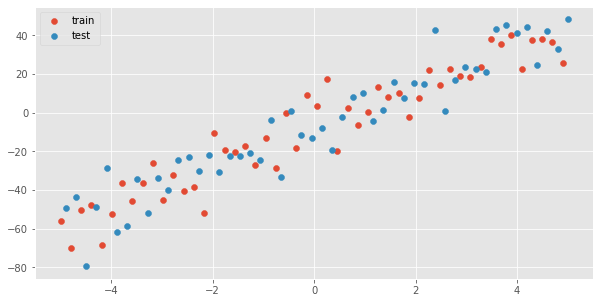

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w = model.coef_
b = model.intercept_

In [ ]:
w, b

(array([10.07862266]), -7.736811661652548)

Визуализируем предсказания.

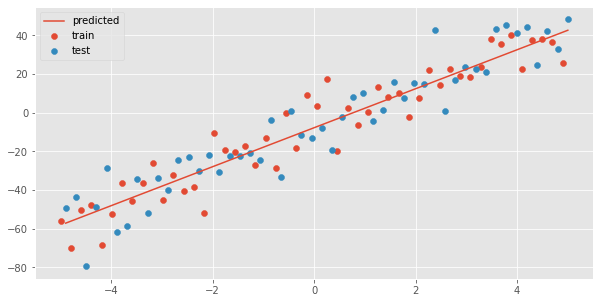

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Задание 3.1

9.256453069050051 -6.64437948697292


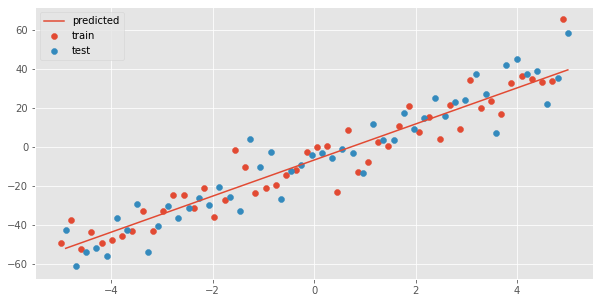

Train MAE:  6.692130534002083
Test MAE:  7.11038217042689
Train MSE:  72.62688970780185
Test MSE:  82.1071807924779


In [ ]:
### Введите свой код
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ownModel = LinearRegression()

x = np.reshape(X_train, X_train.size)
y = np.reshape(y_train, y_train.size)

A = np.vstack([x, np.ones(len(x))]).T

w1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(w1, b1)

ownModel.coef_ = np.array([w1])
ownModel.intercept_ = b1

y_train_predicted = ownModel.predict(X_train)
y_test_predicted = ownModel.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w1) + b1, label='predicted')
plt.legend()
plt.show()

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  72.62688970780185
Test MSE:  82.10718079247793


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  6.692130534002083
Test MAE:  7.110382170426894


Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

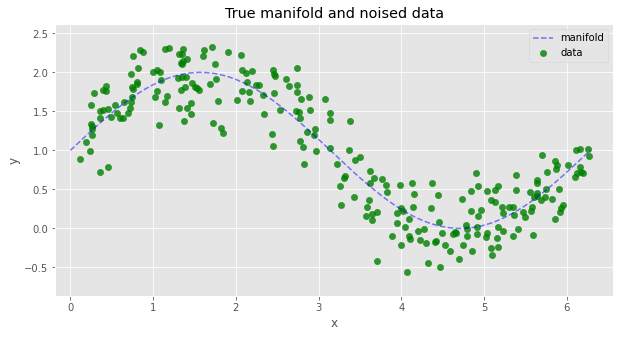

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
model = LinearRegression()

model.fit(data['x_train'].reshape(-1, 1), data['y_train']) # обучение модели

w = model.coef_
b = model.intercept_
print(w, b)

[-0.32727797] 2.0182980620123527


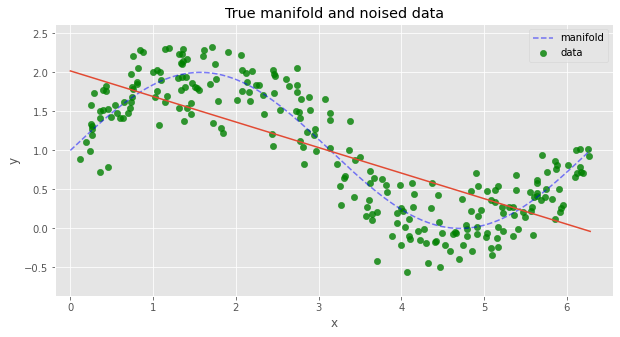

In [ ]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w) + b, label='predicted')
plt.show()

Кажется, что-то пошло не так. Или всё нормально?

## Задание 3.2

-0.32727796623486893 2.0182980620123523


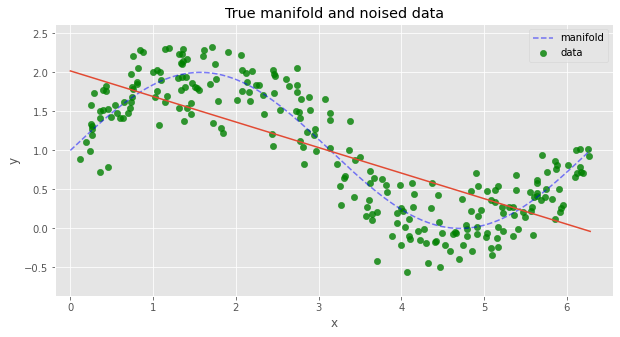

Train MAE:  0.4283320252005775
Train MSE:  0.2646254983657071


In [ ]:
### Введите свой код
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

ownModel = LinearRegression()

x = np.reshape(data["x_train"], data["x_train"].size)
y = np.reshape(data["y_train"], data["y_train"].size)

A = np.vstack([x, np.ones(len(x))]).T

w1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(w1, b1)

ownModel.coef_ = np.array([w1])
ownModel.intercept_ = b1

y_train_predicted = ownModel.predict(data["x_train"].reshape(-1, 1))
y_test_predicted = ownModel.predict(data["support"].reshape(-1, 1))

plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w1) + b1, label='predicted')
plt.show()

print('Train MAE: ', mean_absolute_error(data["y_train"], y_train_predicted))
print('Train MSE: ', mean_squared_error(data["y_train"], y_train_predicted))

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

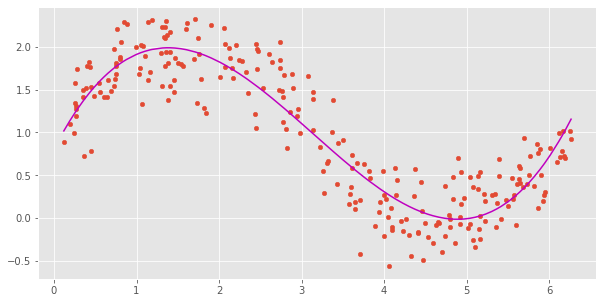

Train MAE:  0.24975862735349524


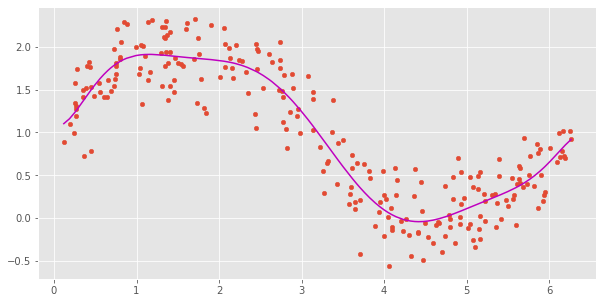

Train MAE:  0.23107746281677252


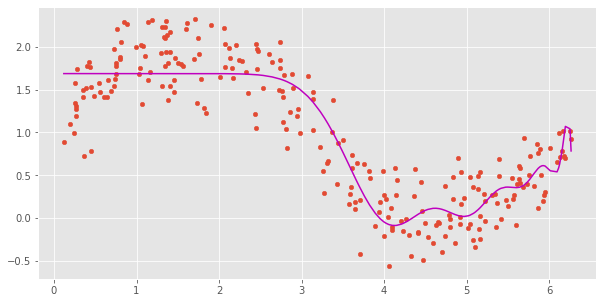

Train MAE:  0.2709820937879168


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import operator

### Введите свой код.
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

x = data["x_train"]
y = data["y_train"]

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

w = model.coef_
b = model.intercept_

### 3
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=20)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
print('Train MAE: ', mean_absolute_error(data["y_train"], y_poly_pred))
### 10

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=20)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

print('Train MAE: ', mean_absolute_error(data["y_train"], y_poly_pred))
### 30

polynomial_features= PolynomialFeatures(degree=30)
x_poly = polynomial_features.fit_transform(x)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=20)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

print('Train MAE: ', mean_absolute_error(data["y_train"], y_poly_pred))

## Используя полином высокой степени есть риск натолкнуться на
## overfitting (модель слишком сильно подстроится под тренировочные
## данные). лучше выбрать 3 степень, чтобы сильно не подстраиваться под тренировочные
## данные

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

Визуализируем распределения признаков в датасете

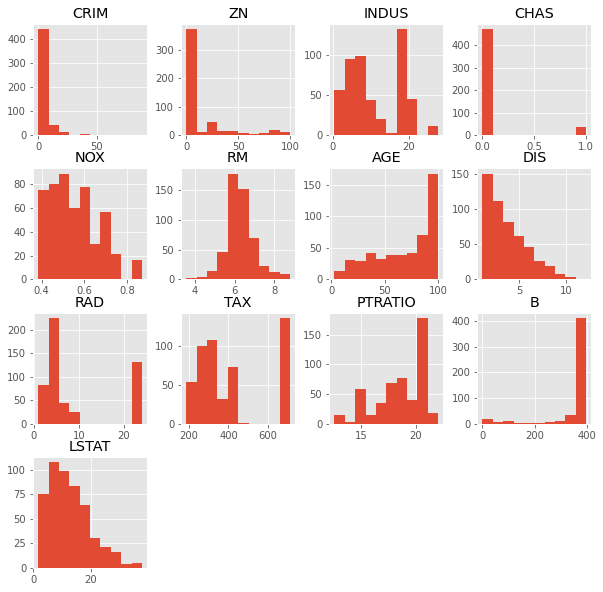

In [ ]:
_ = X.hist(X.columns, figsize=(10, 10))

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
y_train.shape, y_test.shape

((354,), (152,))

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  23.29416783001448
Test MSE:  20.587283054487813
Train MAE:  3.4263398827916514
Test MAE:  3.3504701543125743


Визуализируем получившиеся веса. Какие выводы мы можем сделать из этой визуализации?



<BarContainer object of 13 artists>

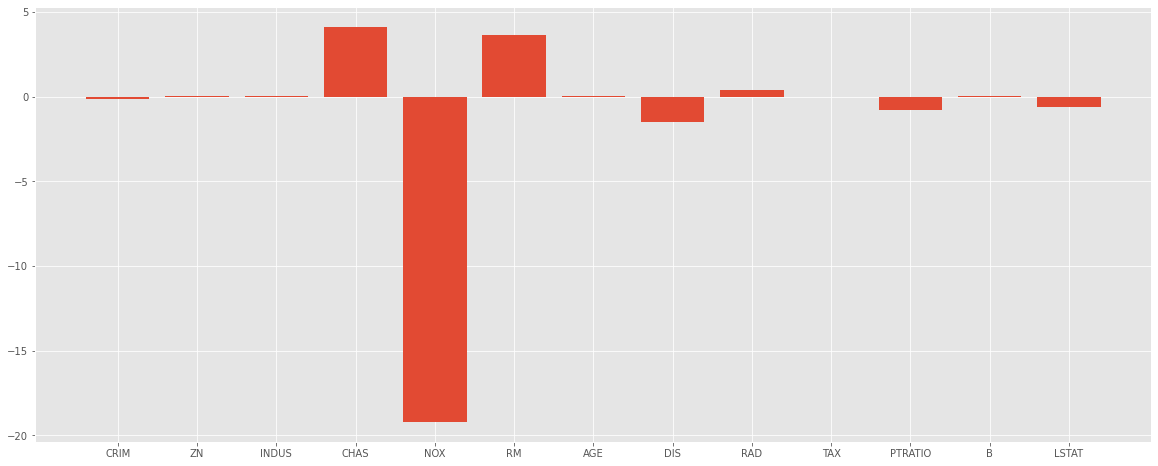

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

<BarContainer object of 13 artists>

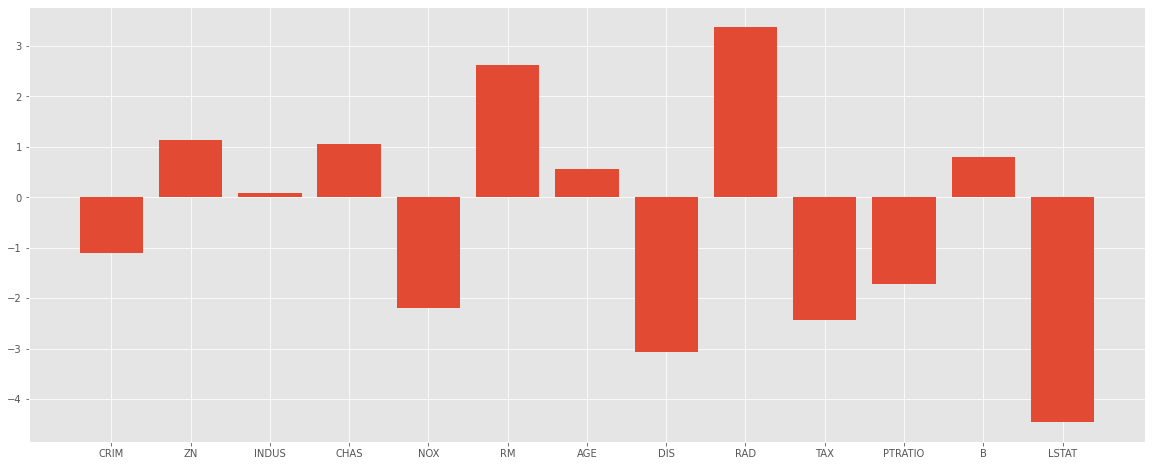

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Какие выводы мы можем сделать из этой визуализации?

## Задание 3.4

In [ ]:
### введите свой код
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

# Full dataset
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))
# создаем датафрейм, сортируем индексы по модулю в порядке убывния, 
# выводим топ 7
d = {"coefs": model.coef_, "feature": X.columns}
coef_feature = pd.DataFrame(data=d)
coef_feature = coef_feature.iloc[(-np.abs(coef_feature["coefs"].values)).argsort()].head(7)

Train MSE:  23.294167830014484
Test MSE:  20.5872830544877
Train MAE:  3.426339882791656
Test MAE:  3.350470154312563


Top 7: 
Train MSE:  25.410724174547976
Test MSE:  21.772548883663628
Train MAE:  3.5097129324606637
Test MAE:  3.604224339685294


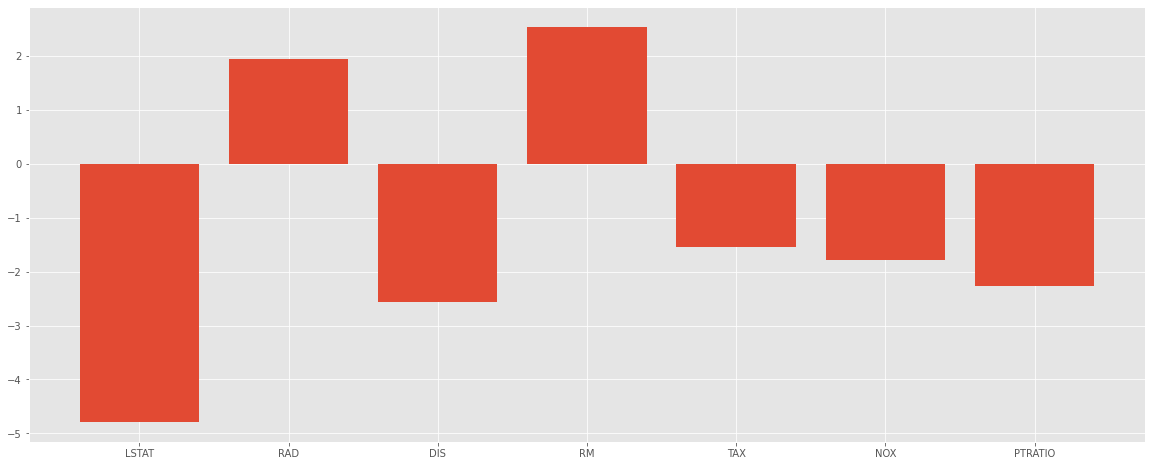

In [ ]:
X = X[coef_feature["feature"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

print("Top 7: ")
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

### модель стала менее сложной, следственно потеряла
### точность. Те признаки не имели нулевой вес
### а значит влияли на предсказание